In [1]:
import io_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import datetime
import matplotlib.dates as mdates

In [2]:
full = pd.read_csv('2009_2022CompleteMagPOLAR.csv')

In [3]:
dates = ['2013-06-05', '2013-06-06', '2015-06-22', '2017-05-15', '2014-09-11', '2014-09-12', '2016-06-23', '2016-08-02']

In [6]:
date = '2013-06-05'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-cal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-cal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-vvelsLat-geo-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv('../AOS99/FinalData/'+date+'MAG.csv')

d1 = df2

In [10]:
date = '2015-06-22'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv('../AOS99/FinalData/'+date+'MAG.csv')

d2 = df2

In [12]:
date = '2017-05-15'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.002_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.002_ac_1min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.002_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv('../AOS99/FinalData/'+date+'MAG.csv')

d3 = df2

In [14]:
date = '2014-09-11'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv('../AOS99/FinalData/'+date+'MAG.csv')

d4 = df2

In [15]:
date = '2016-06-23'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv('../AOS99/FinalData/'+date+'MAG.csv')

d5 = df2

In [16]:
date = '2016-08-02'
plaindate = date.replace('-',"")
underdate = date.replace('-',"_")

datadir = '/Users/alan/Downloads/AOS99/'+underdate+'/'
lpfilename=datadir+plaindate+'.001_lp_1min-fitcal.h5'
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+plaindate+'.001_ac_3min-fitcal.h5'
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+plaindate+'.001_lp_1min-fitcal-vvelsLat-60sec.h5'
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv(date+'.csv')

indicies = df.loc[(mdates.date2num(df['Date']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['Date']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()

vn = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['Date']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))

magdicies = full.loc[(mdates.date2num(full['Date_UTC']) >= mdates.date2num(df['Date'])[0]) & (mdates.date2num(full['Date_UTC']) <= mdates.date2num(df['Date'])[-1])]
magdicies = magdicies.reset_index()

data = {
    'index':indicies.index,
    'Date':indicies['Date'],
    'BZ_North':indicies['BZ_North'],
    'Velocity_Latitude_n/s':vn,
    'Velocity_Latitude_e/w':ve,
    'Magnetometer_Magnitude':magdicies['rho'],
    'Magnetometer_Theta':magdicies['theta'],
    'Magnetometer_Phi':magdicies['phi'],
    'Magnetometer_North':magdicies['dbn_nez'],
    'Magnetometer_East':magdicies['dbe_nez'],
    'Magnetometer_Z':magdicies['dbz_nez'],
    'Labels':[0]*len(indicies['Date'])
}
df2 = pd.DataFrame(data)

df2.to_csv('../AOS99/FinalData/'+date+'MAG.csv')

d6 = df2

In [17]:
frames = [
    d1, # 2013-06-05   4 hours  1 div
    d2, # 2015-06-22   6 hours  2 div
    d3, # 2017-05-15   8 hours  2 div
    d4, # 2014-09-11   3 hours  1 div
    d5, # 2016-06-23  22 hours  7 div
    d6  # 2016-08-02  24 hours  8 div
    ]
FinalDataset = pd.concat(frames)
FinalDataset = FinalDataset.reset_index()
FinalDataset.to_csv('CompleteDataset_PolarMags.csv')

In [26]:
d1 = d1.iloc[0:3281]
d2 = d2.iloc[0:5481]
d3 = d3.iloc[0:6770]
d4 = d4.iloc[0:2372]
d5 = d5.iloc[0:23005]
d6 = d6.iloc[0:22275]

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

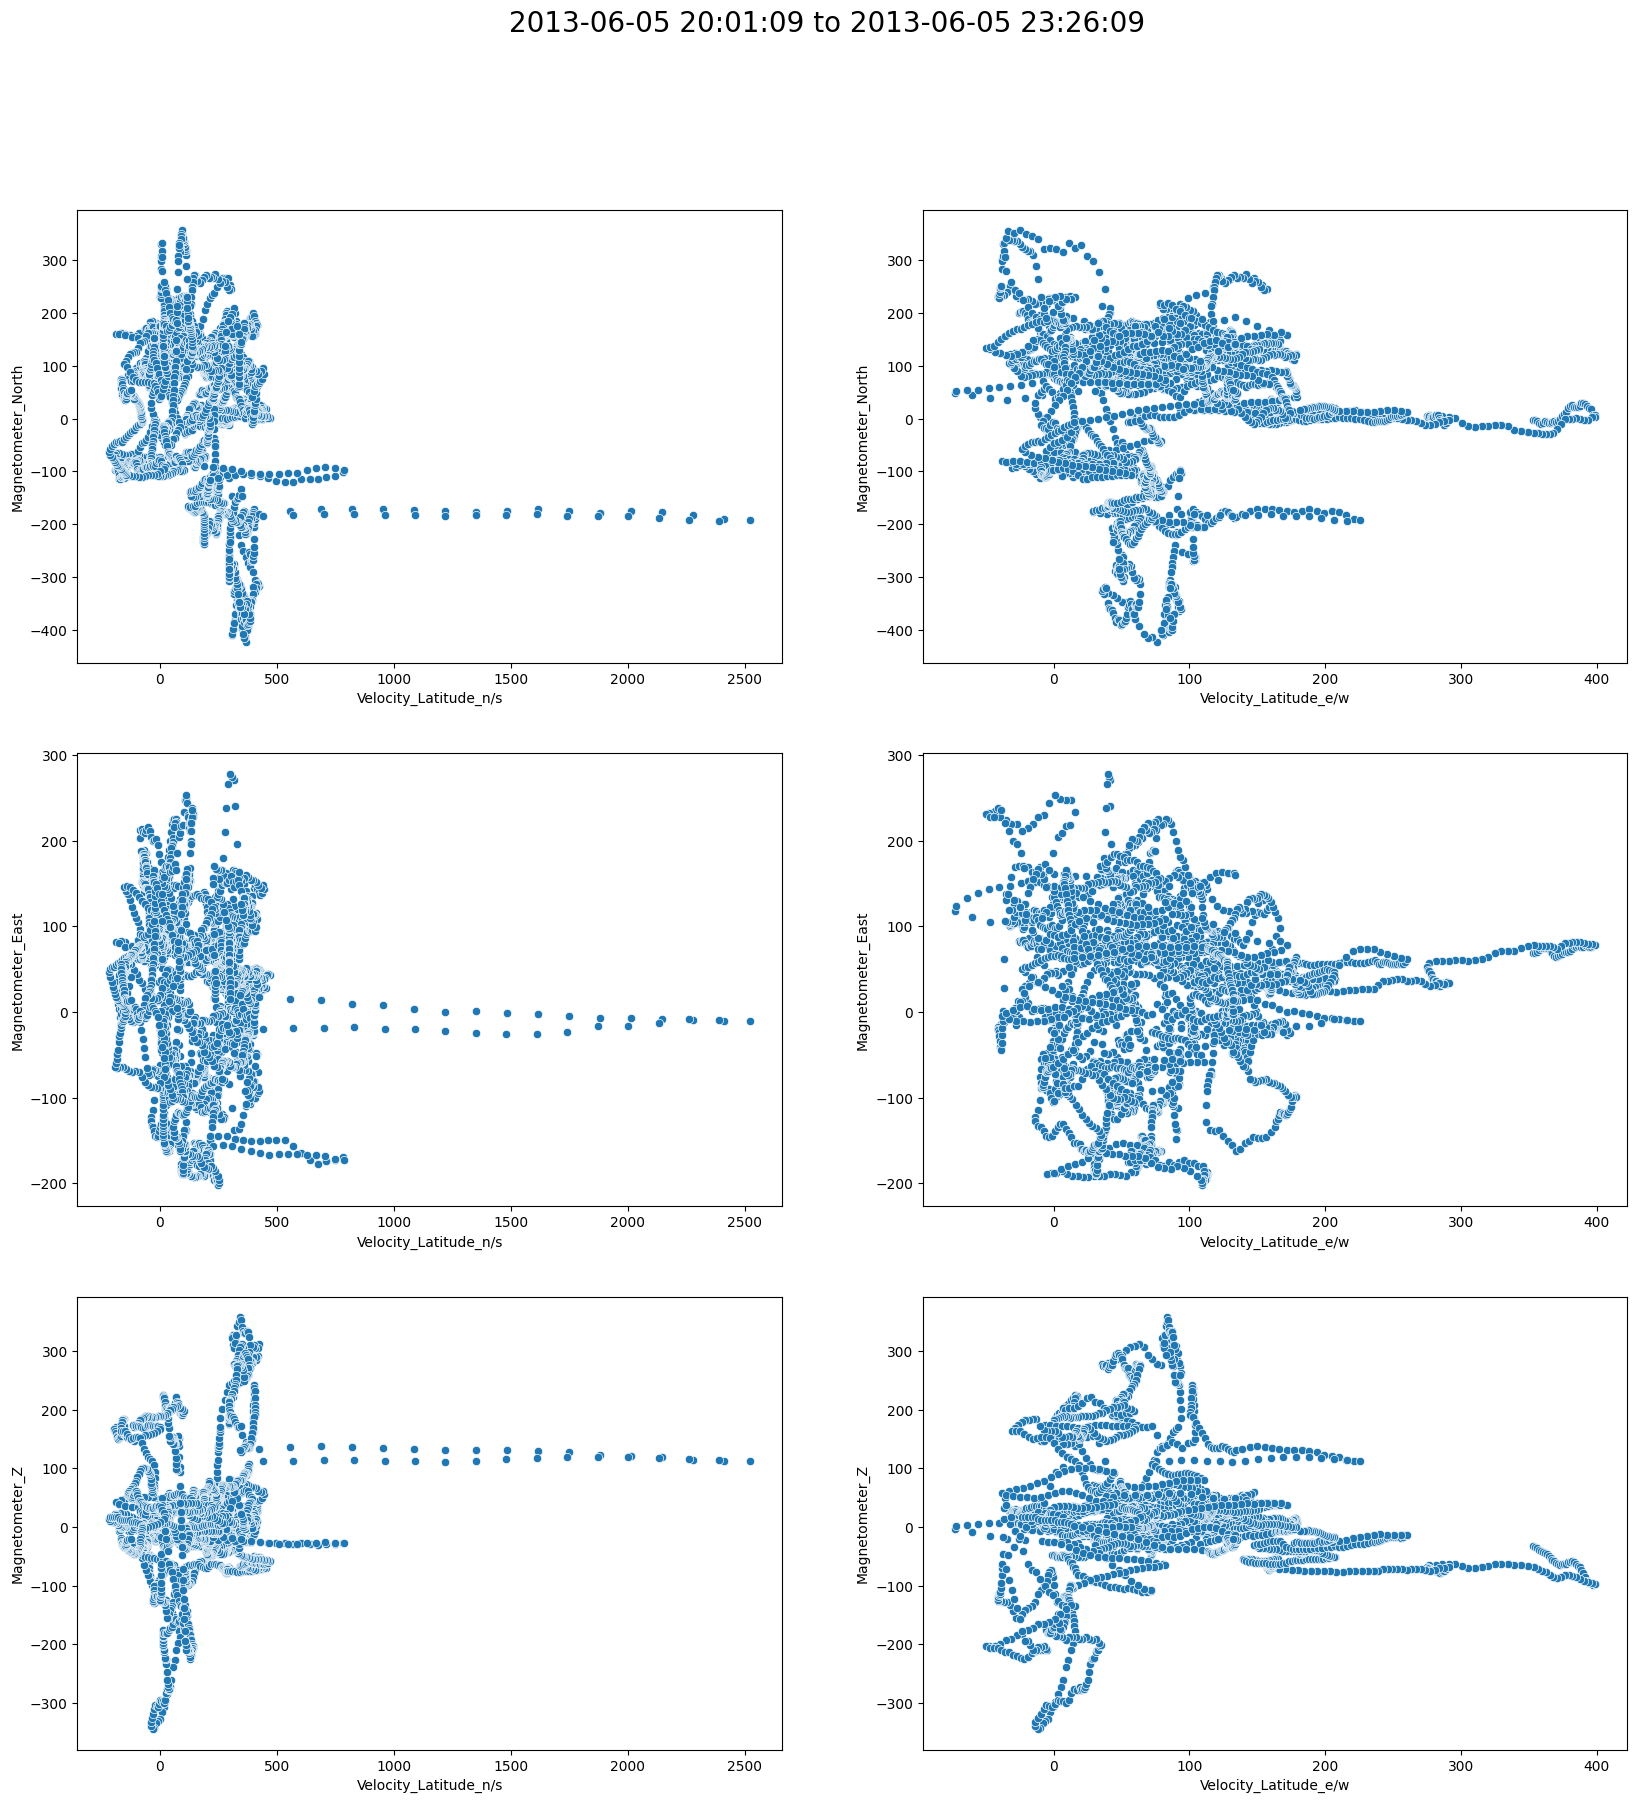

In [27]:
df = d1

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

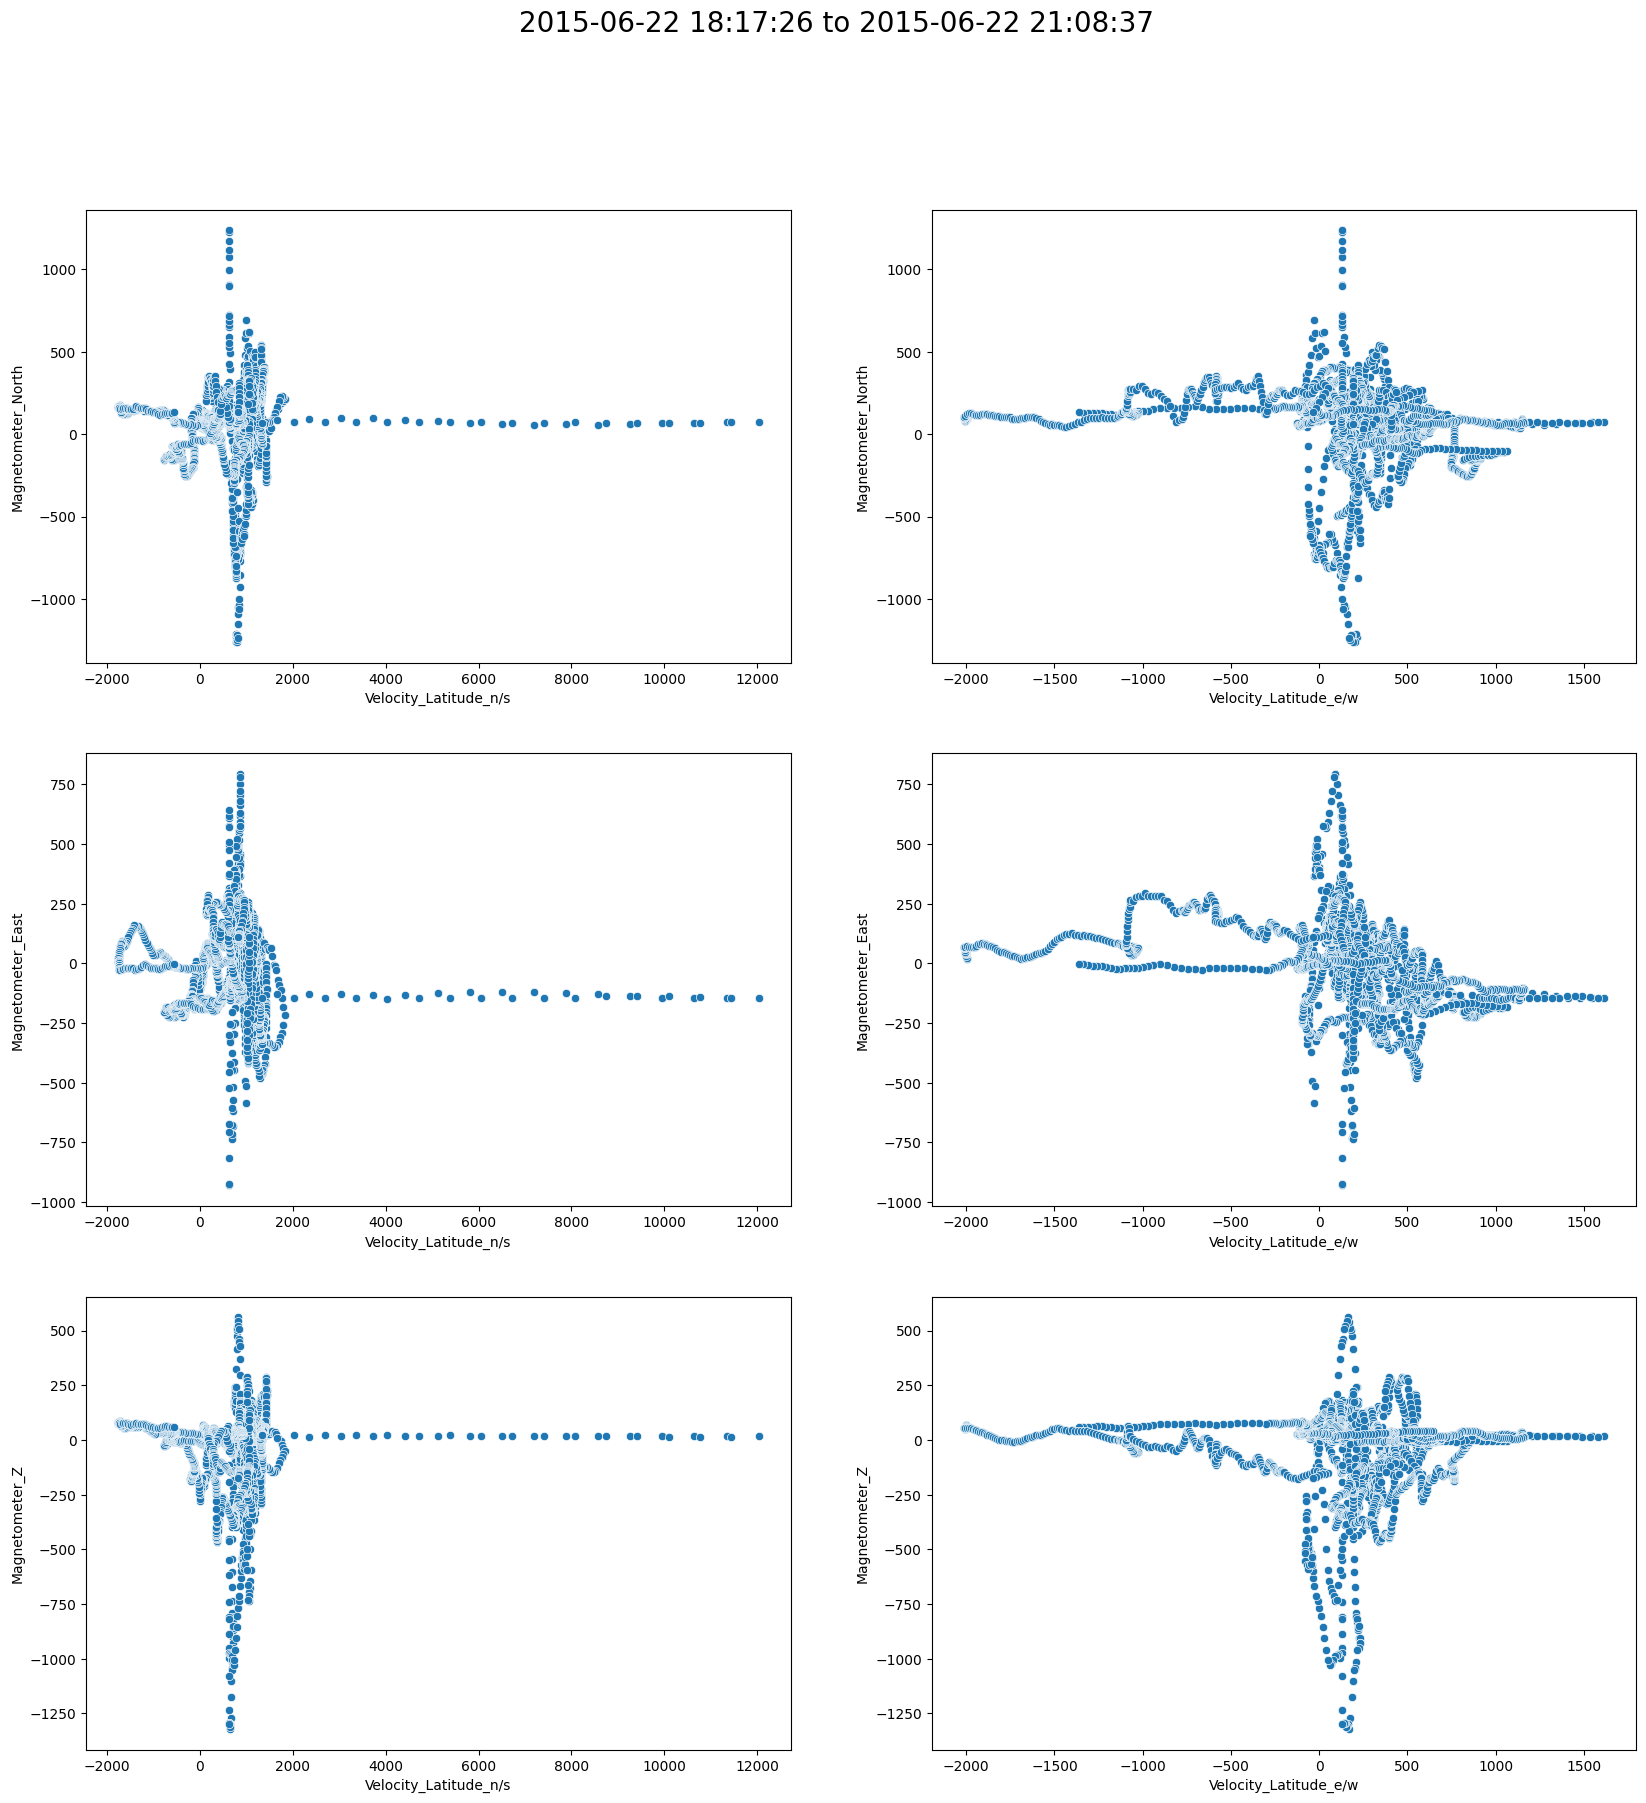

In [28]:
start = 0
end = int(len(d2)/2)
df = d2.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

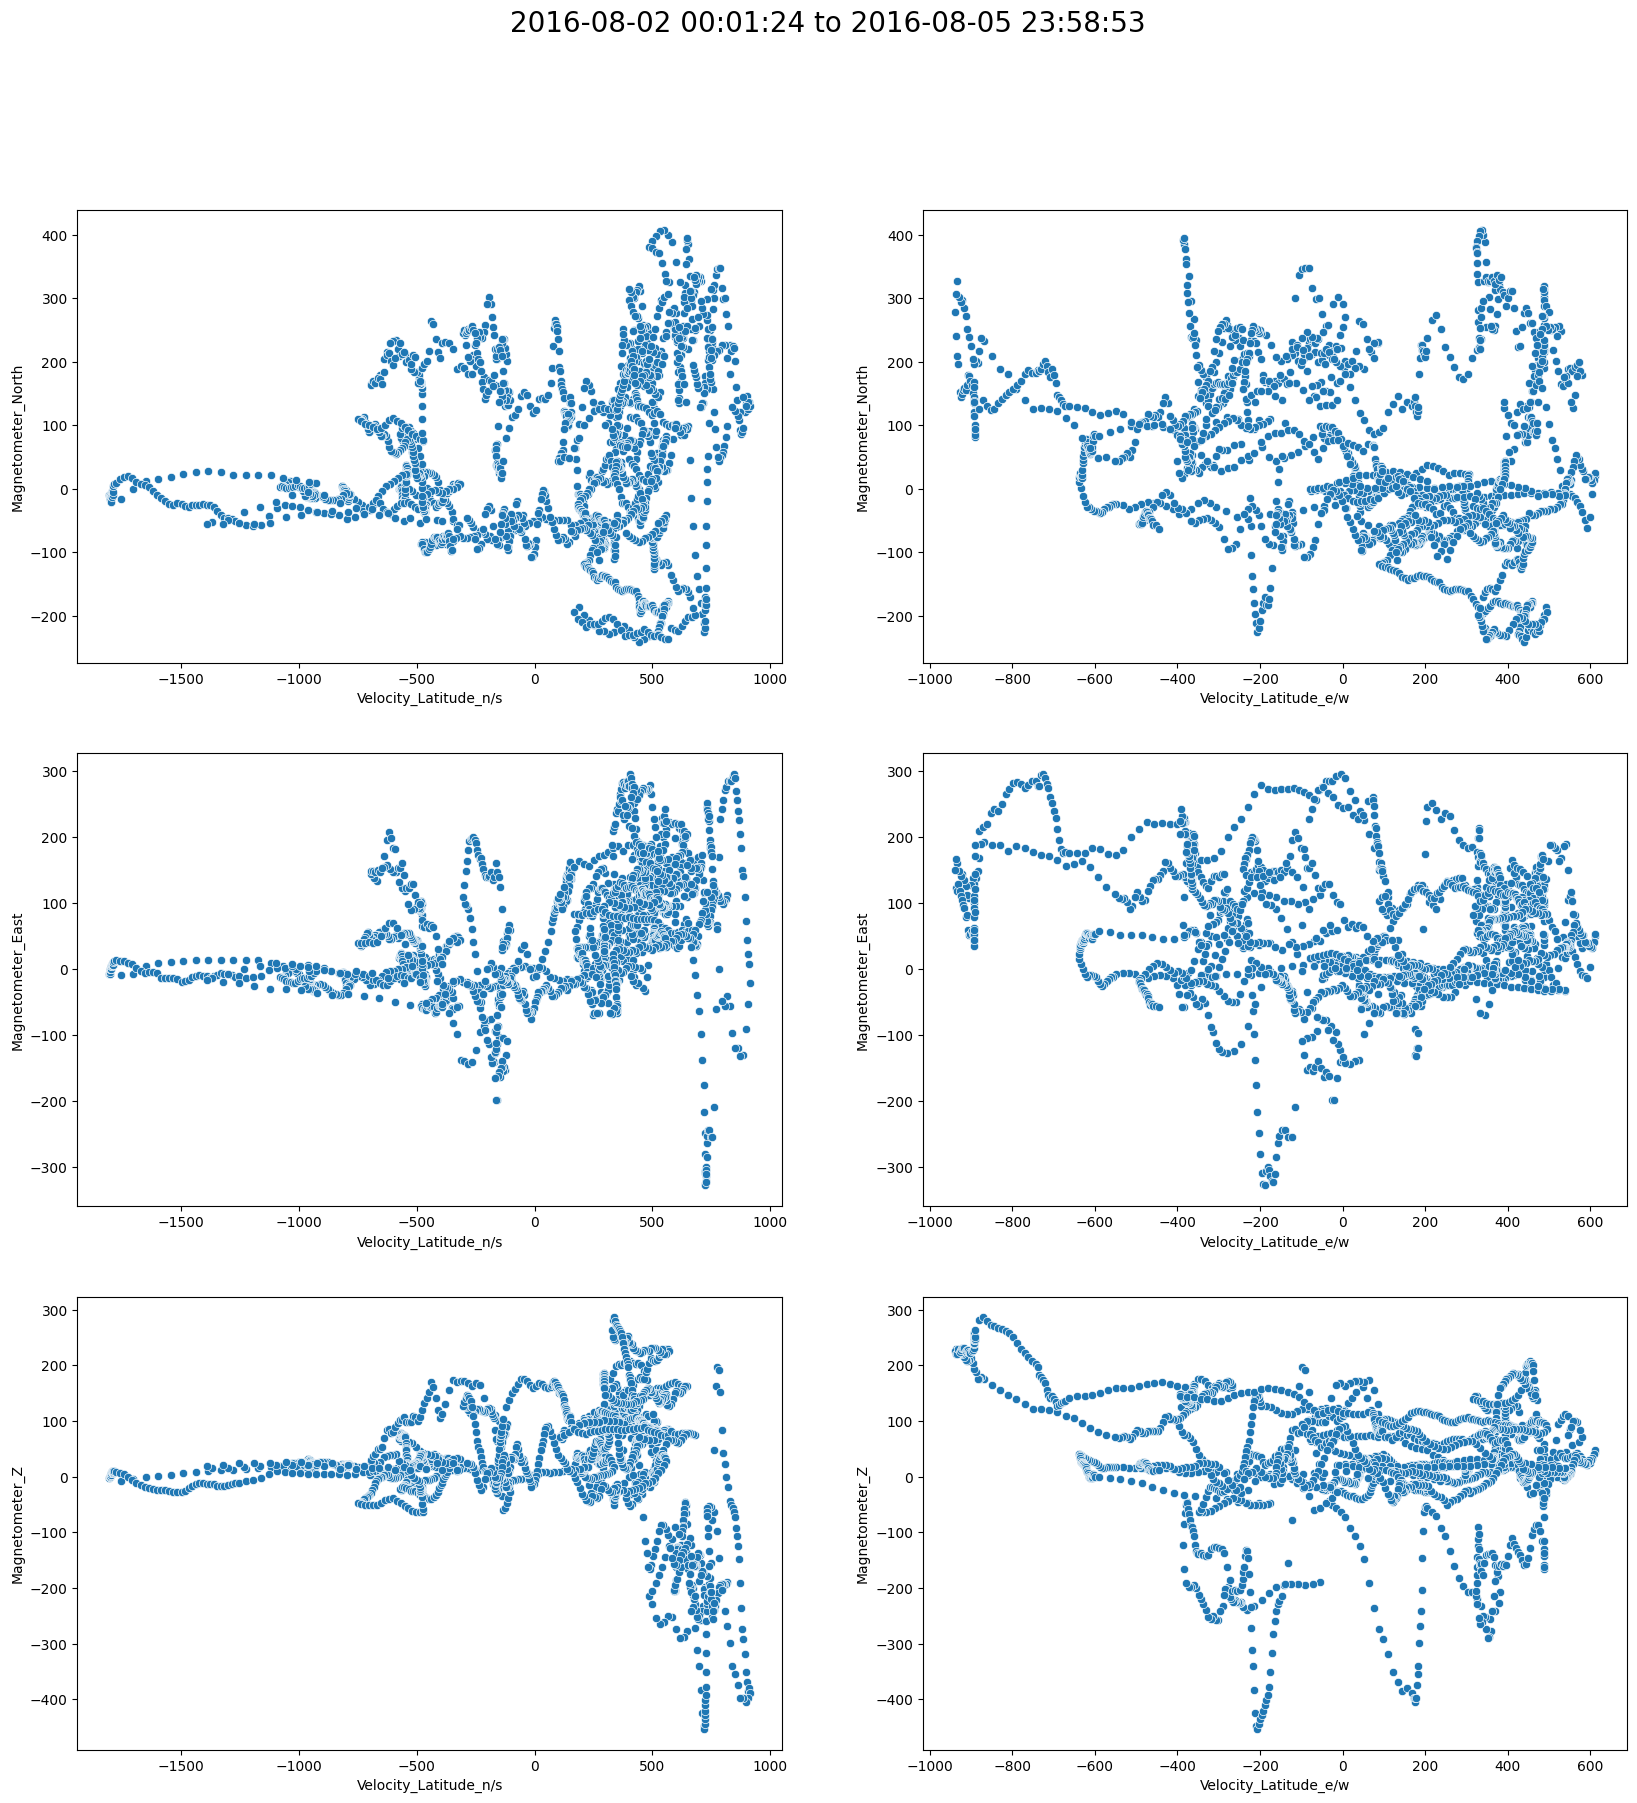

In [29]:
start = int(len(d2)/2)
end = int(len(d2))
df = d2.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

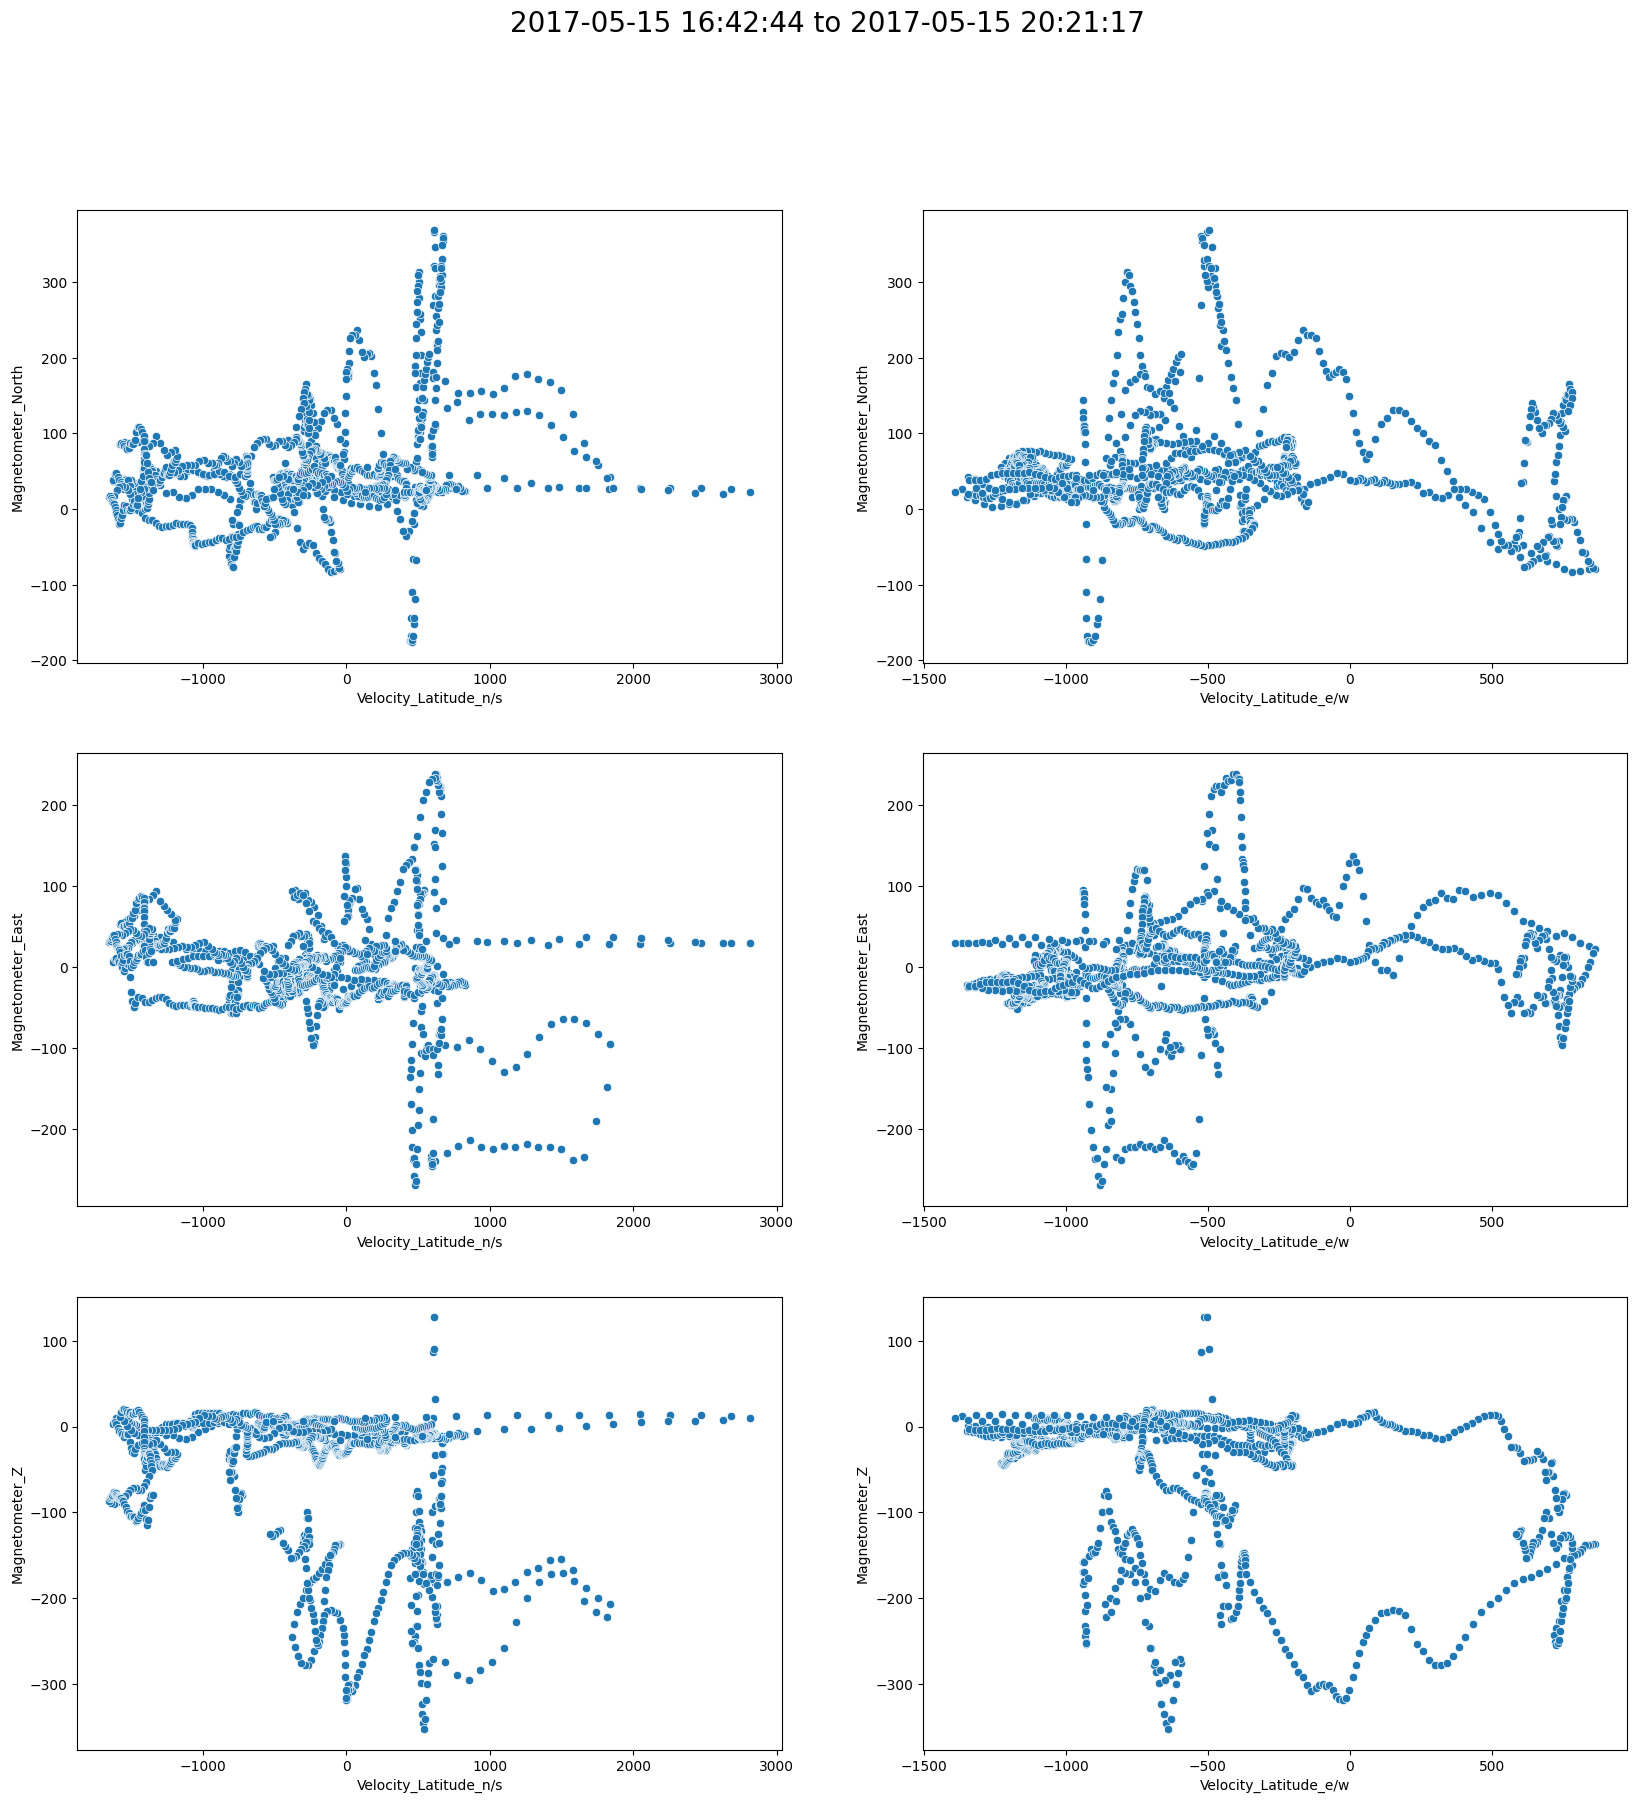

In [32]:
start = 0
end = int(len(d3)/2)
df = d3.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

In [35]:
# start = int(len(d3)/2)
# end = int(len(d3))
# df = d3.iloc[start:end]

# fig,axarr = plt.subplots(3,2,figsize=(20, 20))
# fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
# sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
# sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
# sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

# sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
# sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
# sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

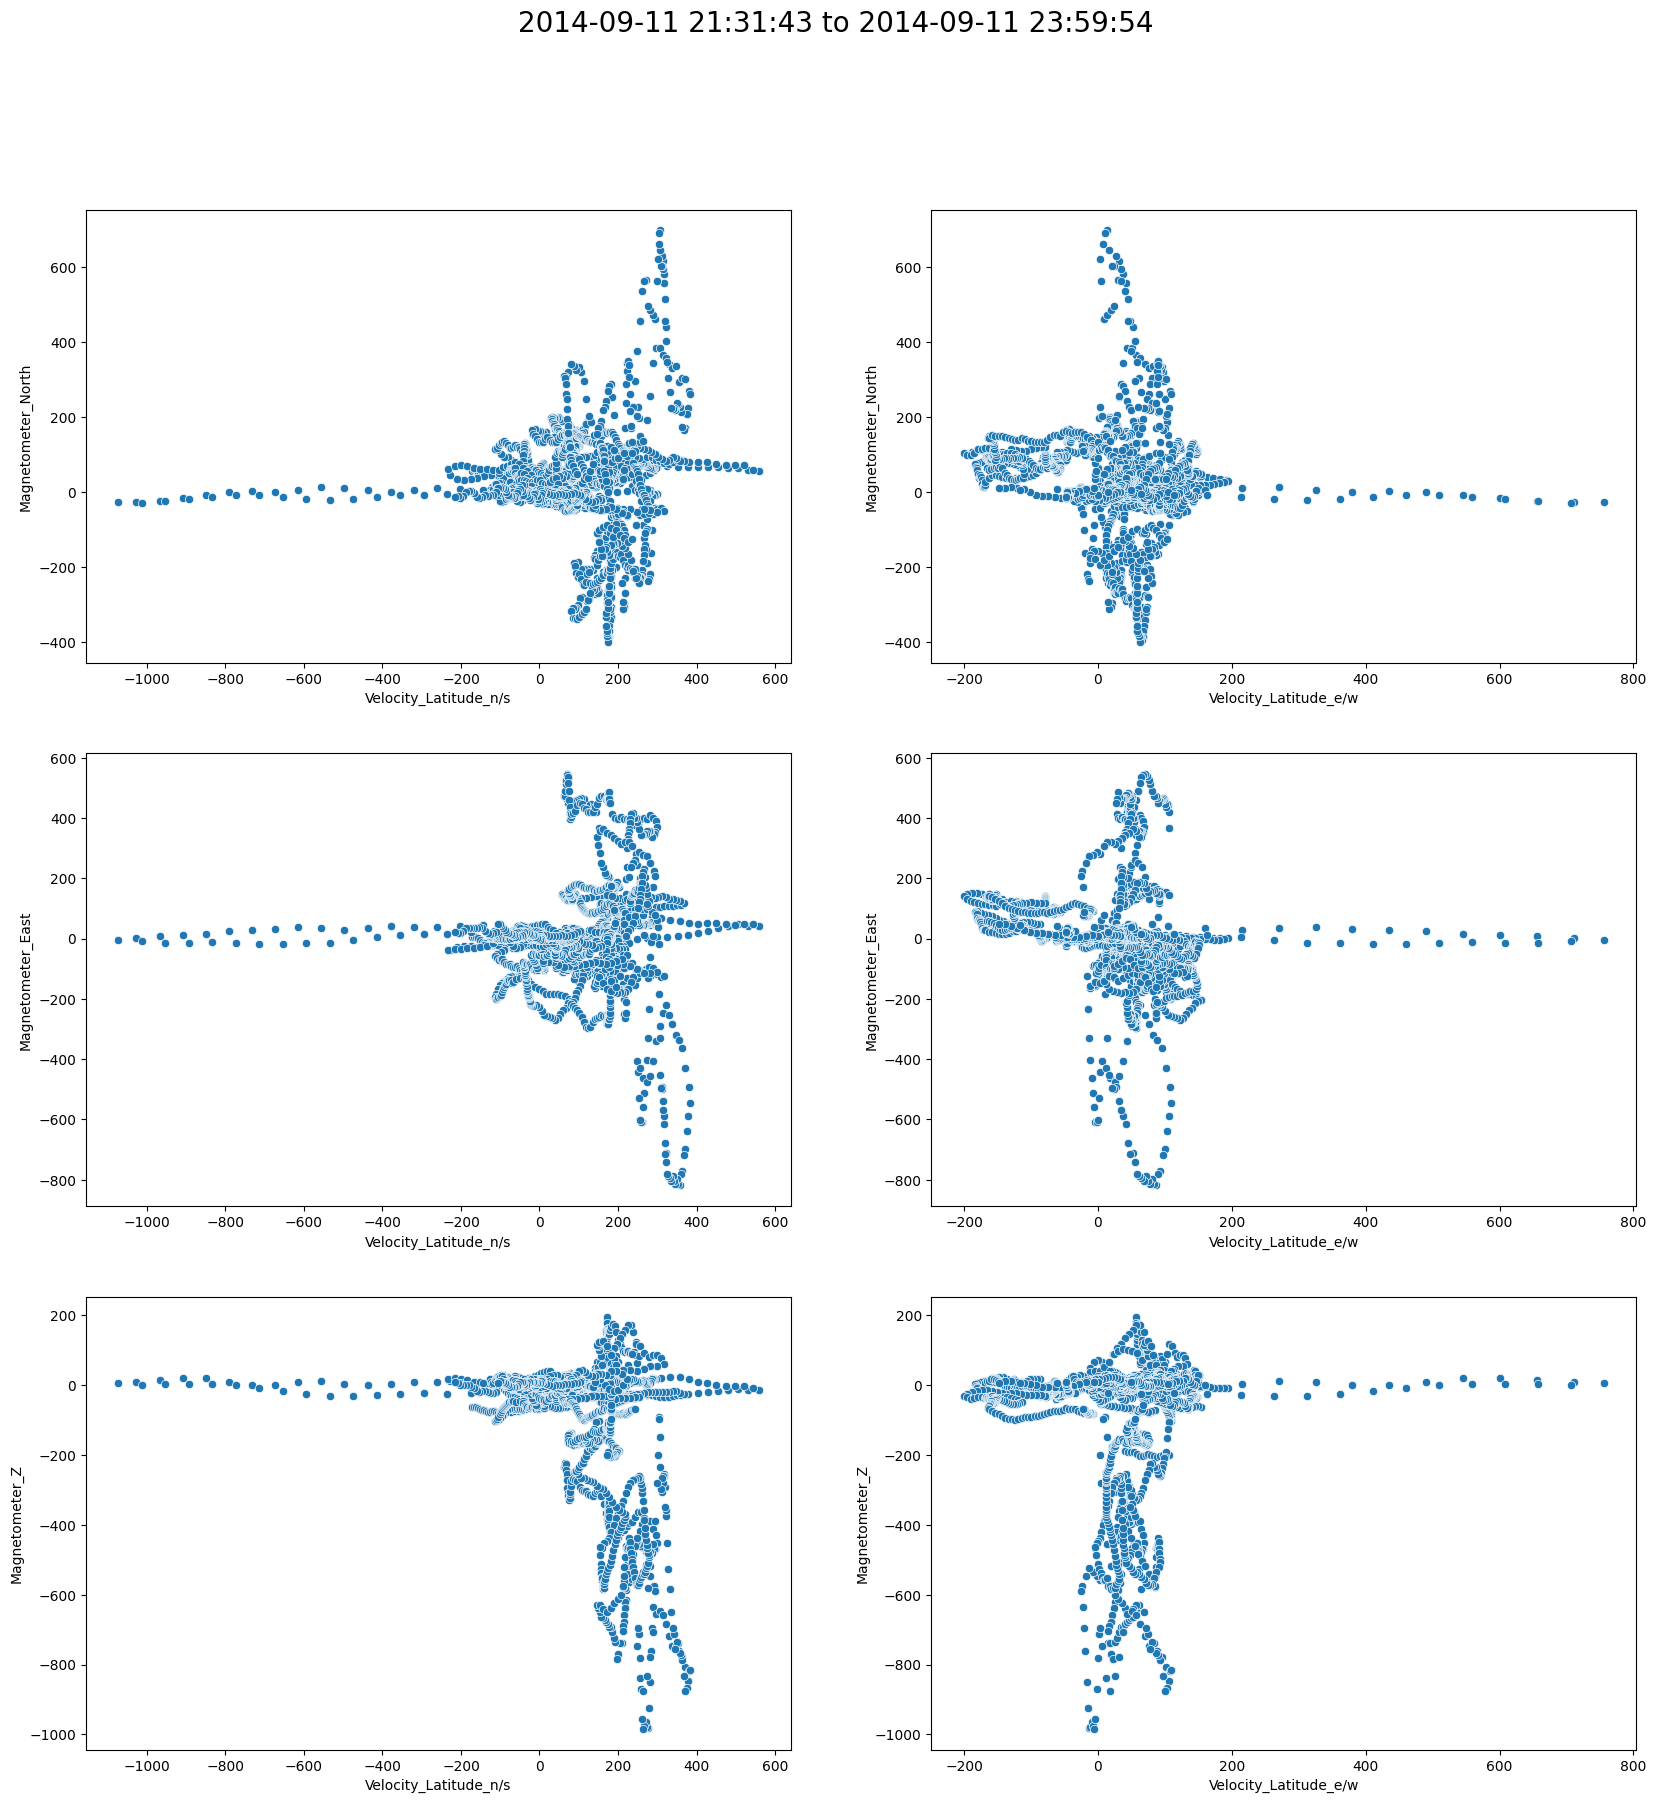

In [36]:
start = 0
end = int(len(d4))
df = d4.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

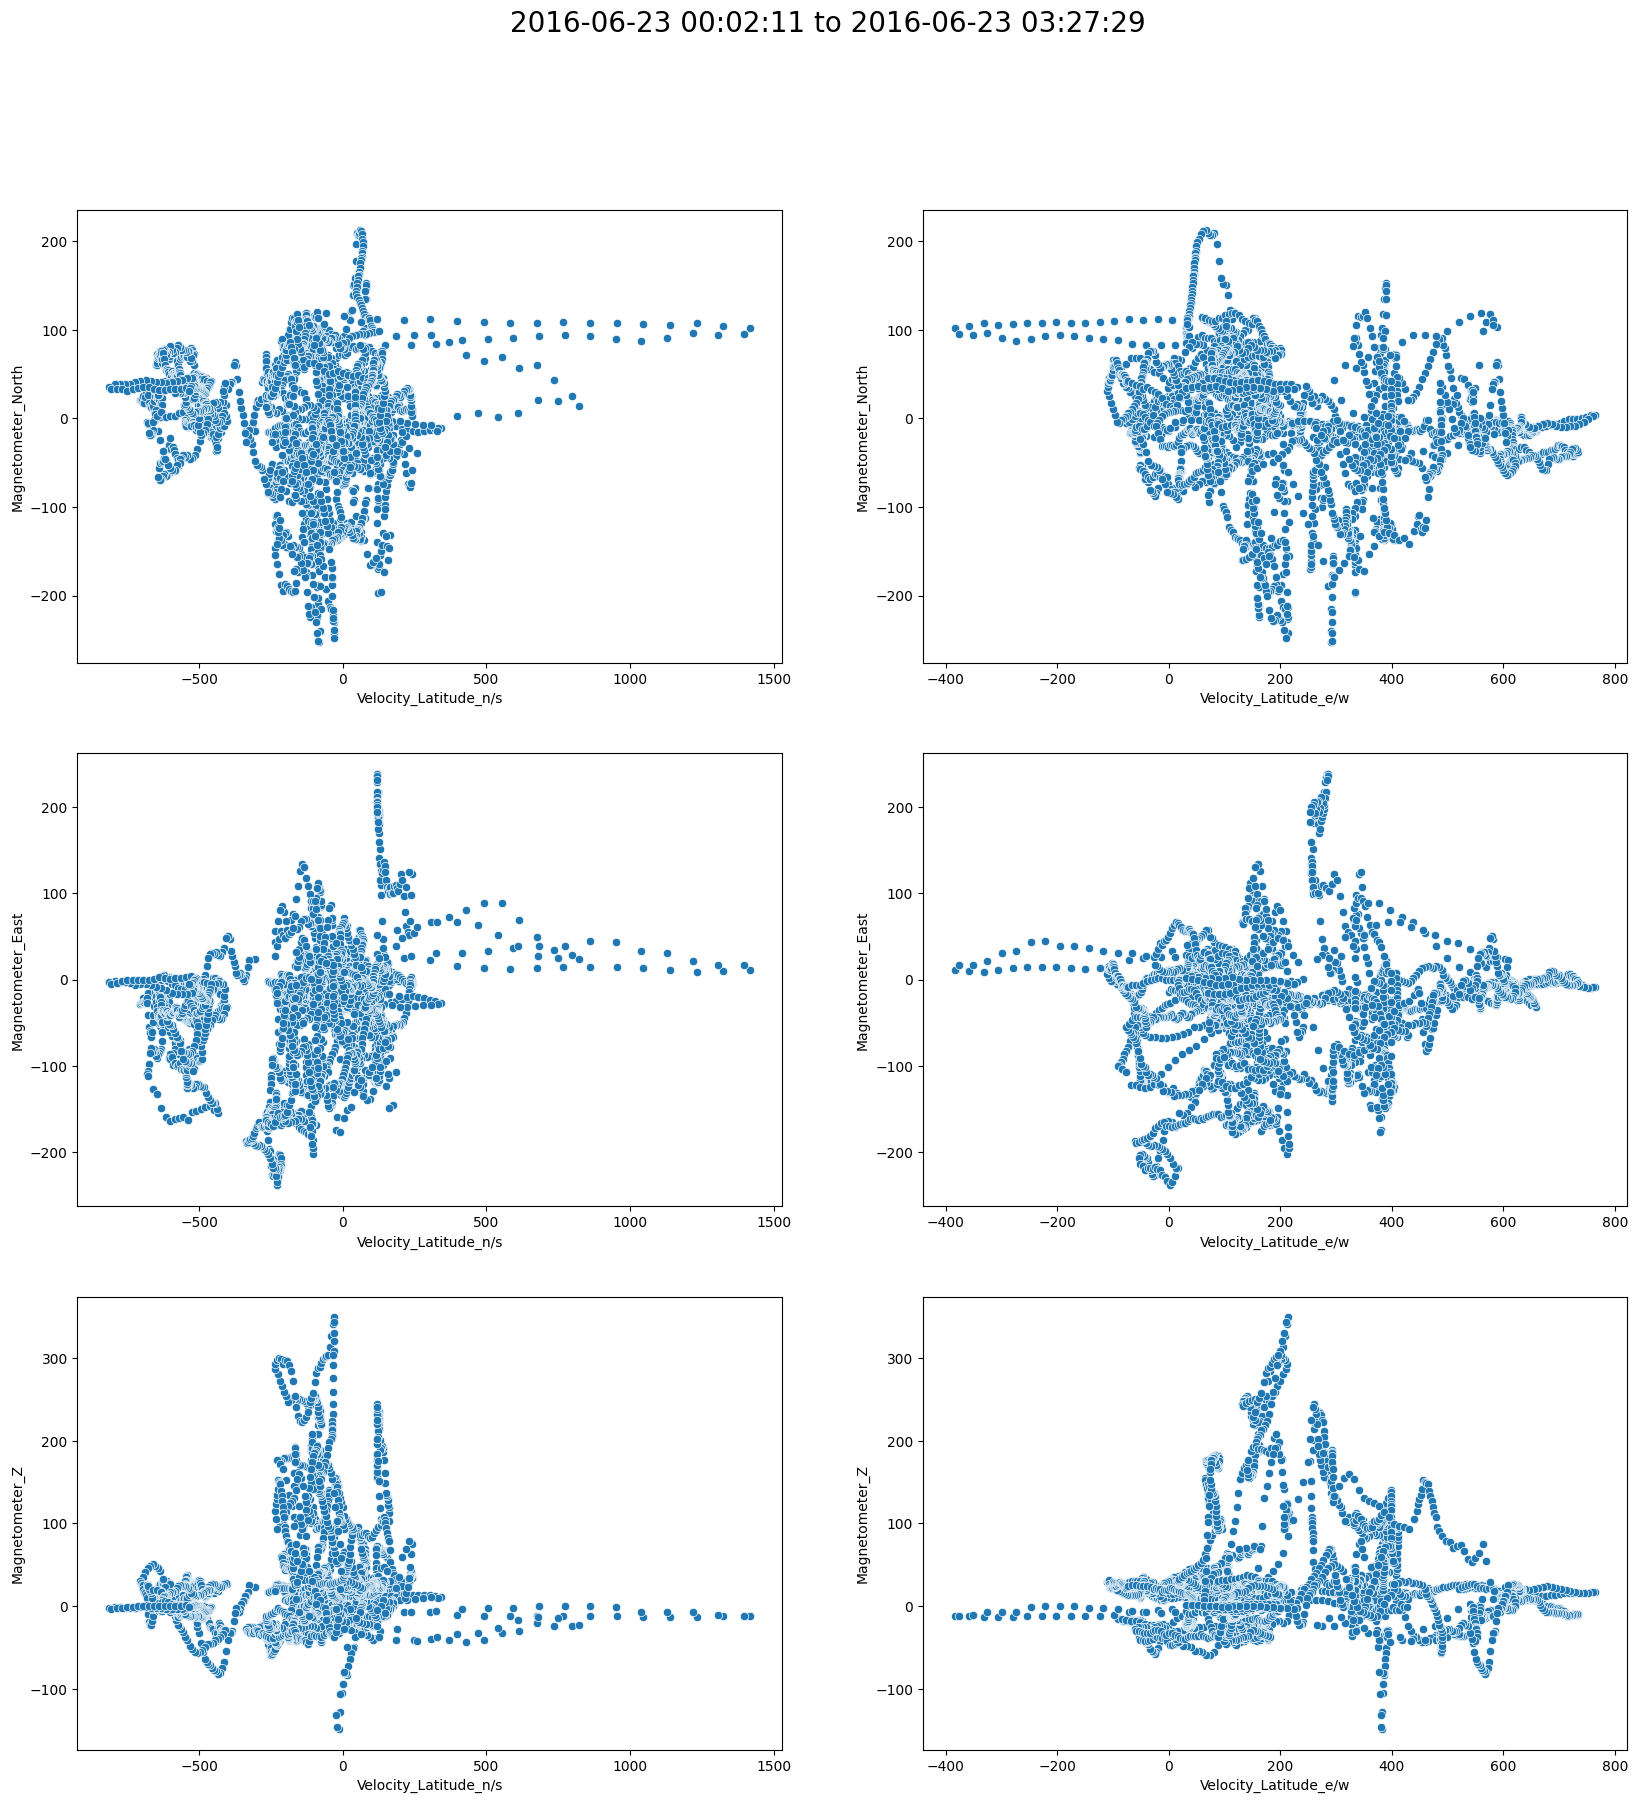

In [37]:
start = 0
end = int(len(d5)/7)
df = d5.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

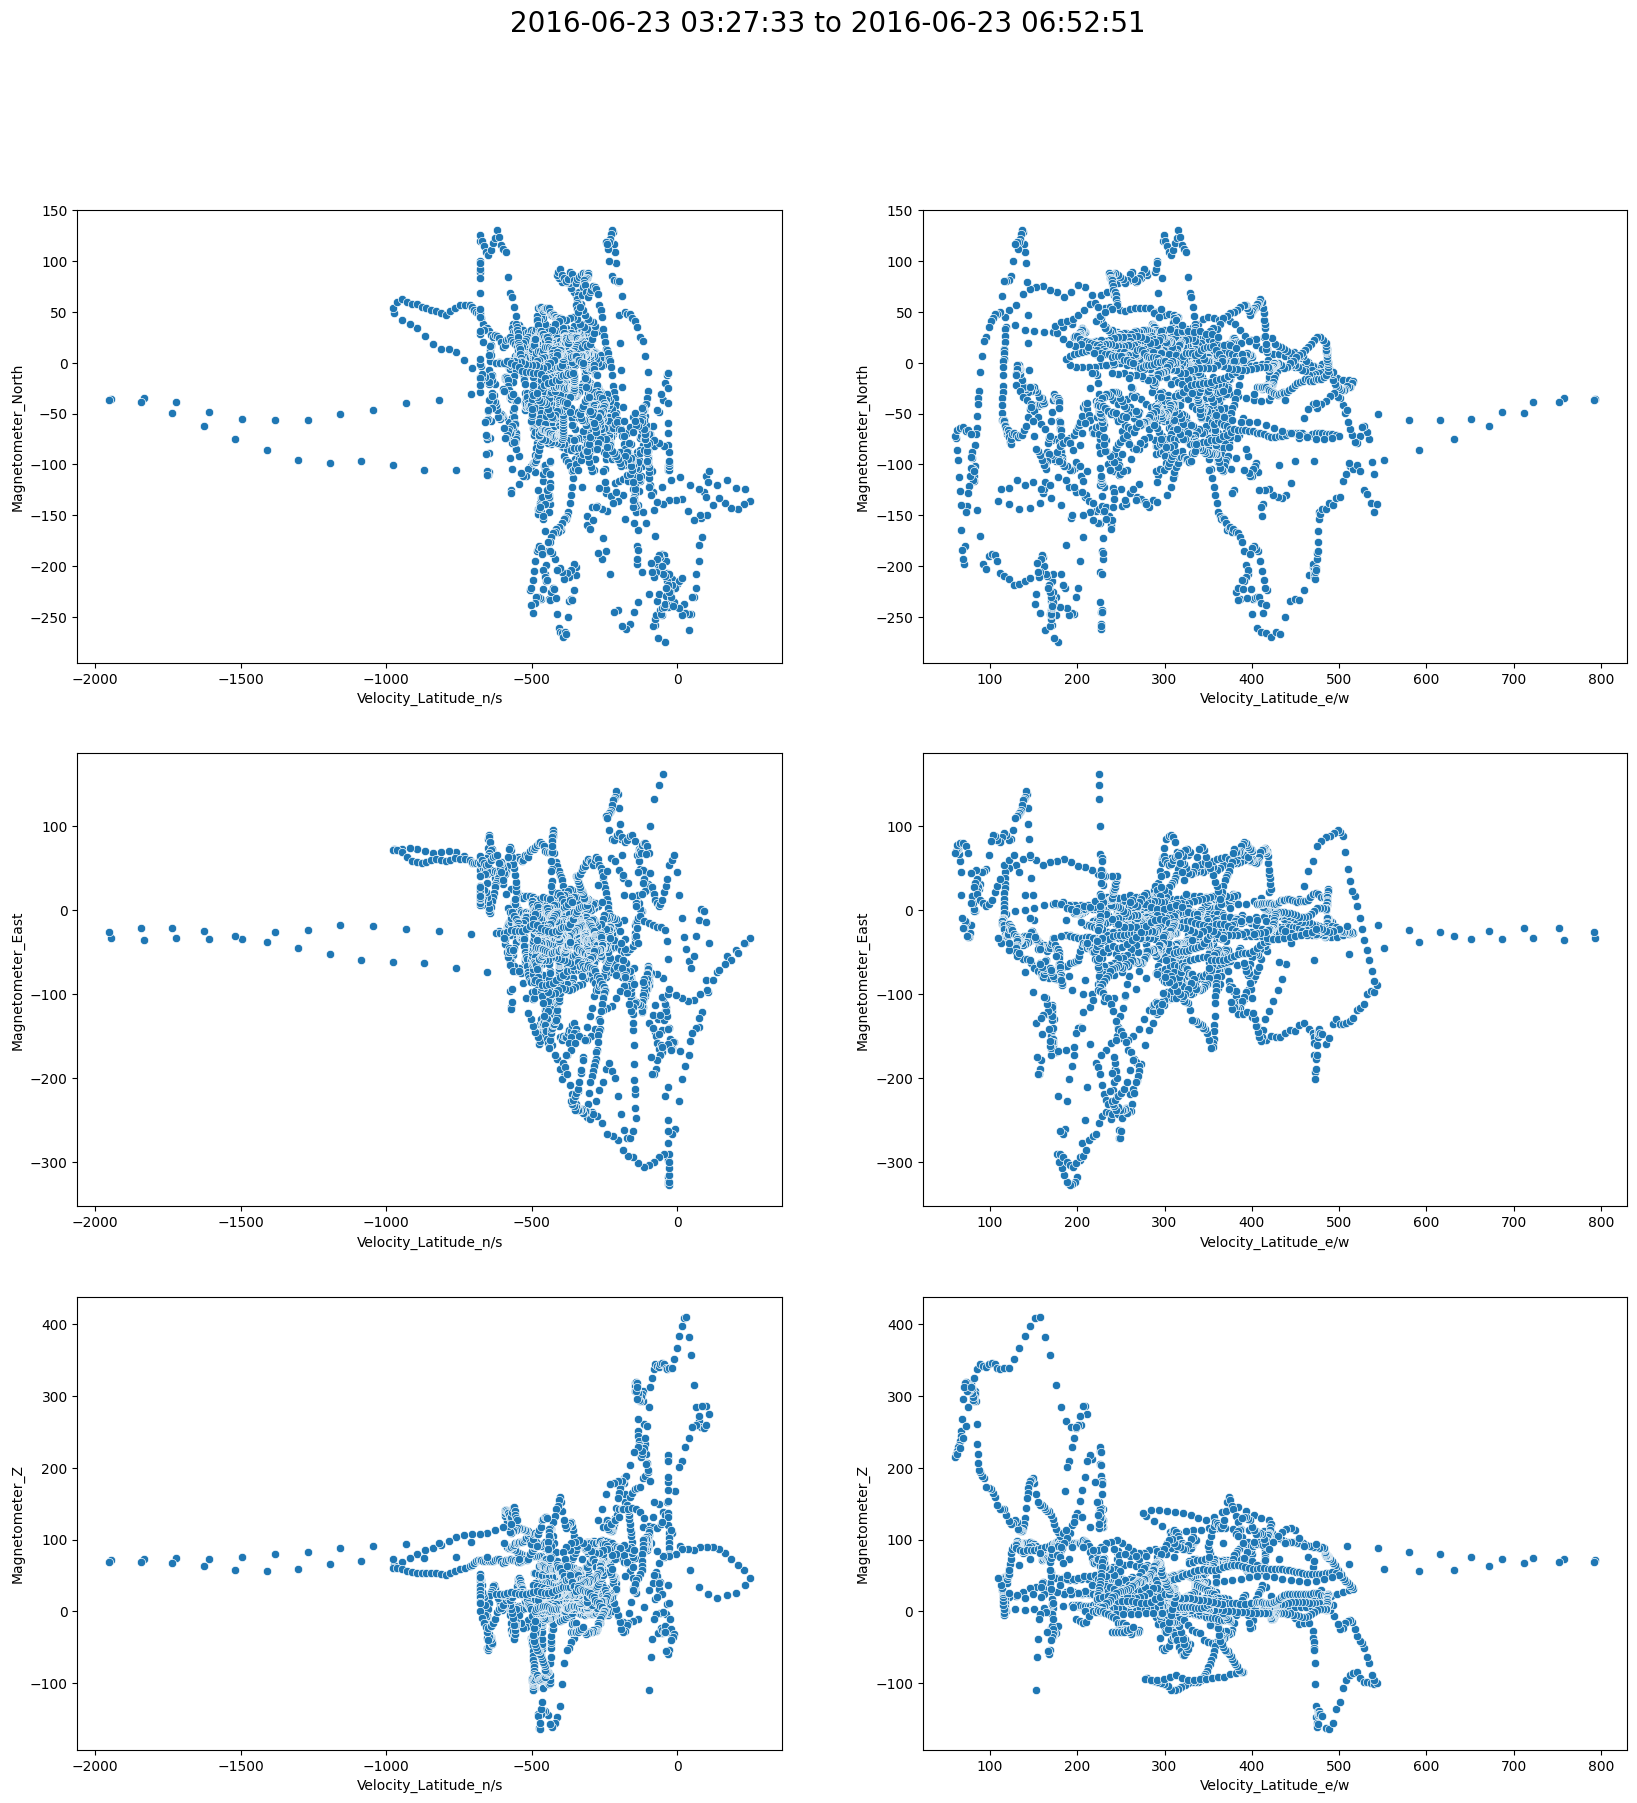

In [38]:
start = int(len(d5)/7)
end = int(2*len(d5)/7)
df = d5.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

In [40]:
# start = int(2*len(d5)/7)
# end = int(3*len(d5)/7)
# df = d5.iloc[start:end]

# fig,axarr = plt.subplots(3,2,figsize=(20, 20))
# fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
# sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
# sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
# sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

# sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
# sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
# sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

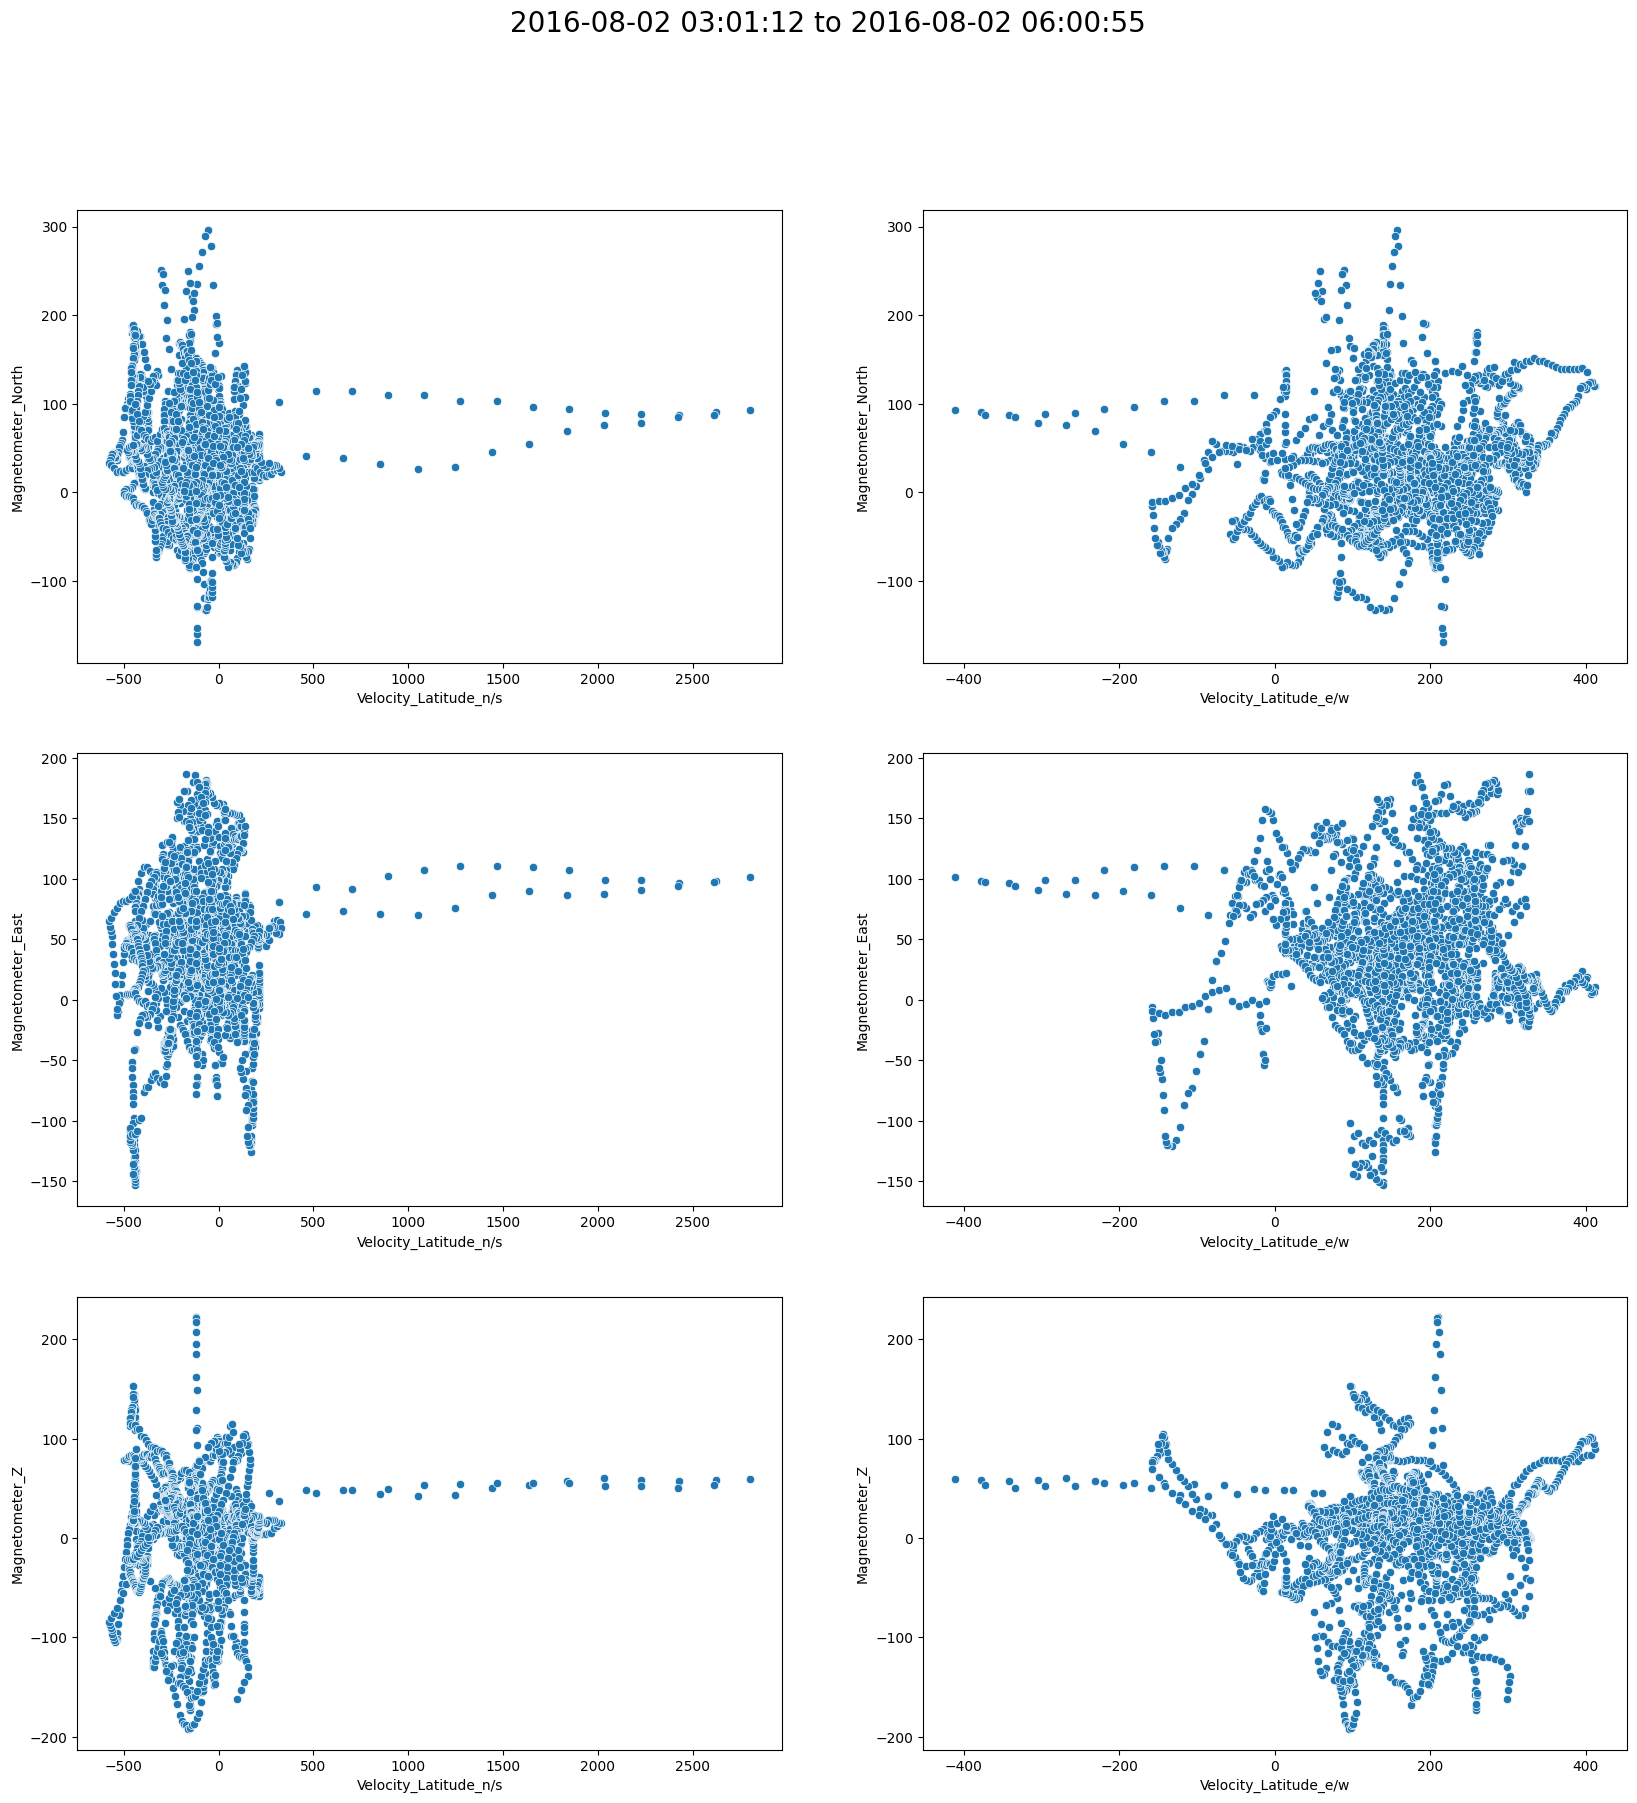

In [46]:
start = int(1*len(d6)/8)
end = int(2*len(d6)/8)
df = d6.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Magnetometer_Z'>

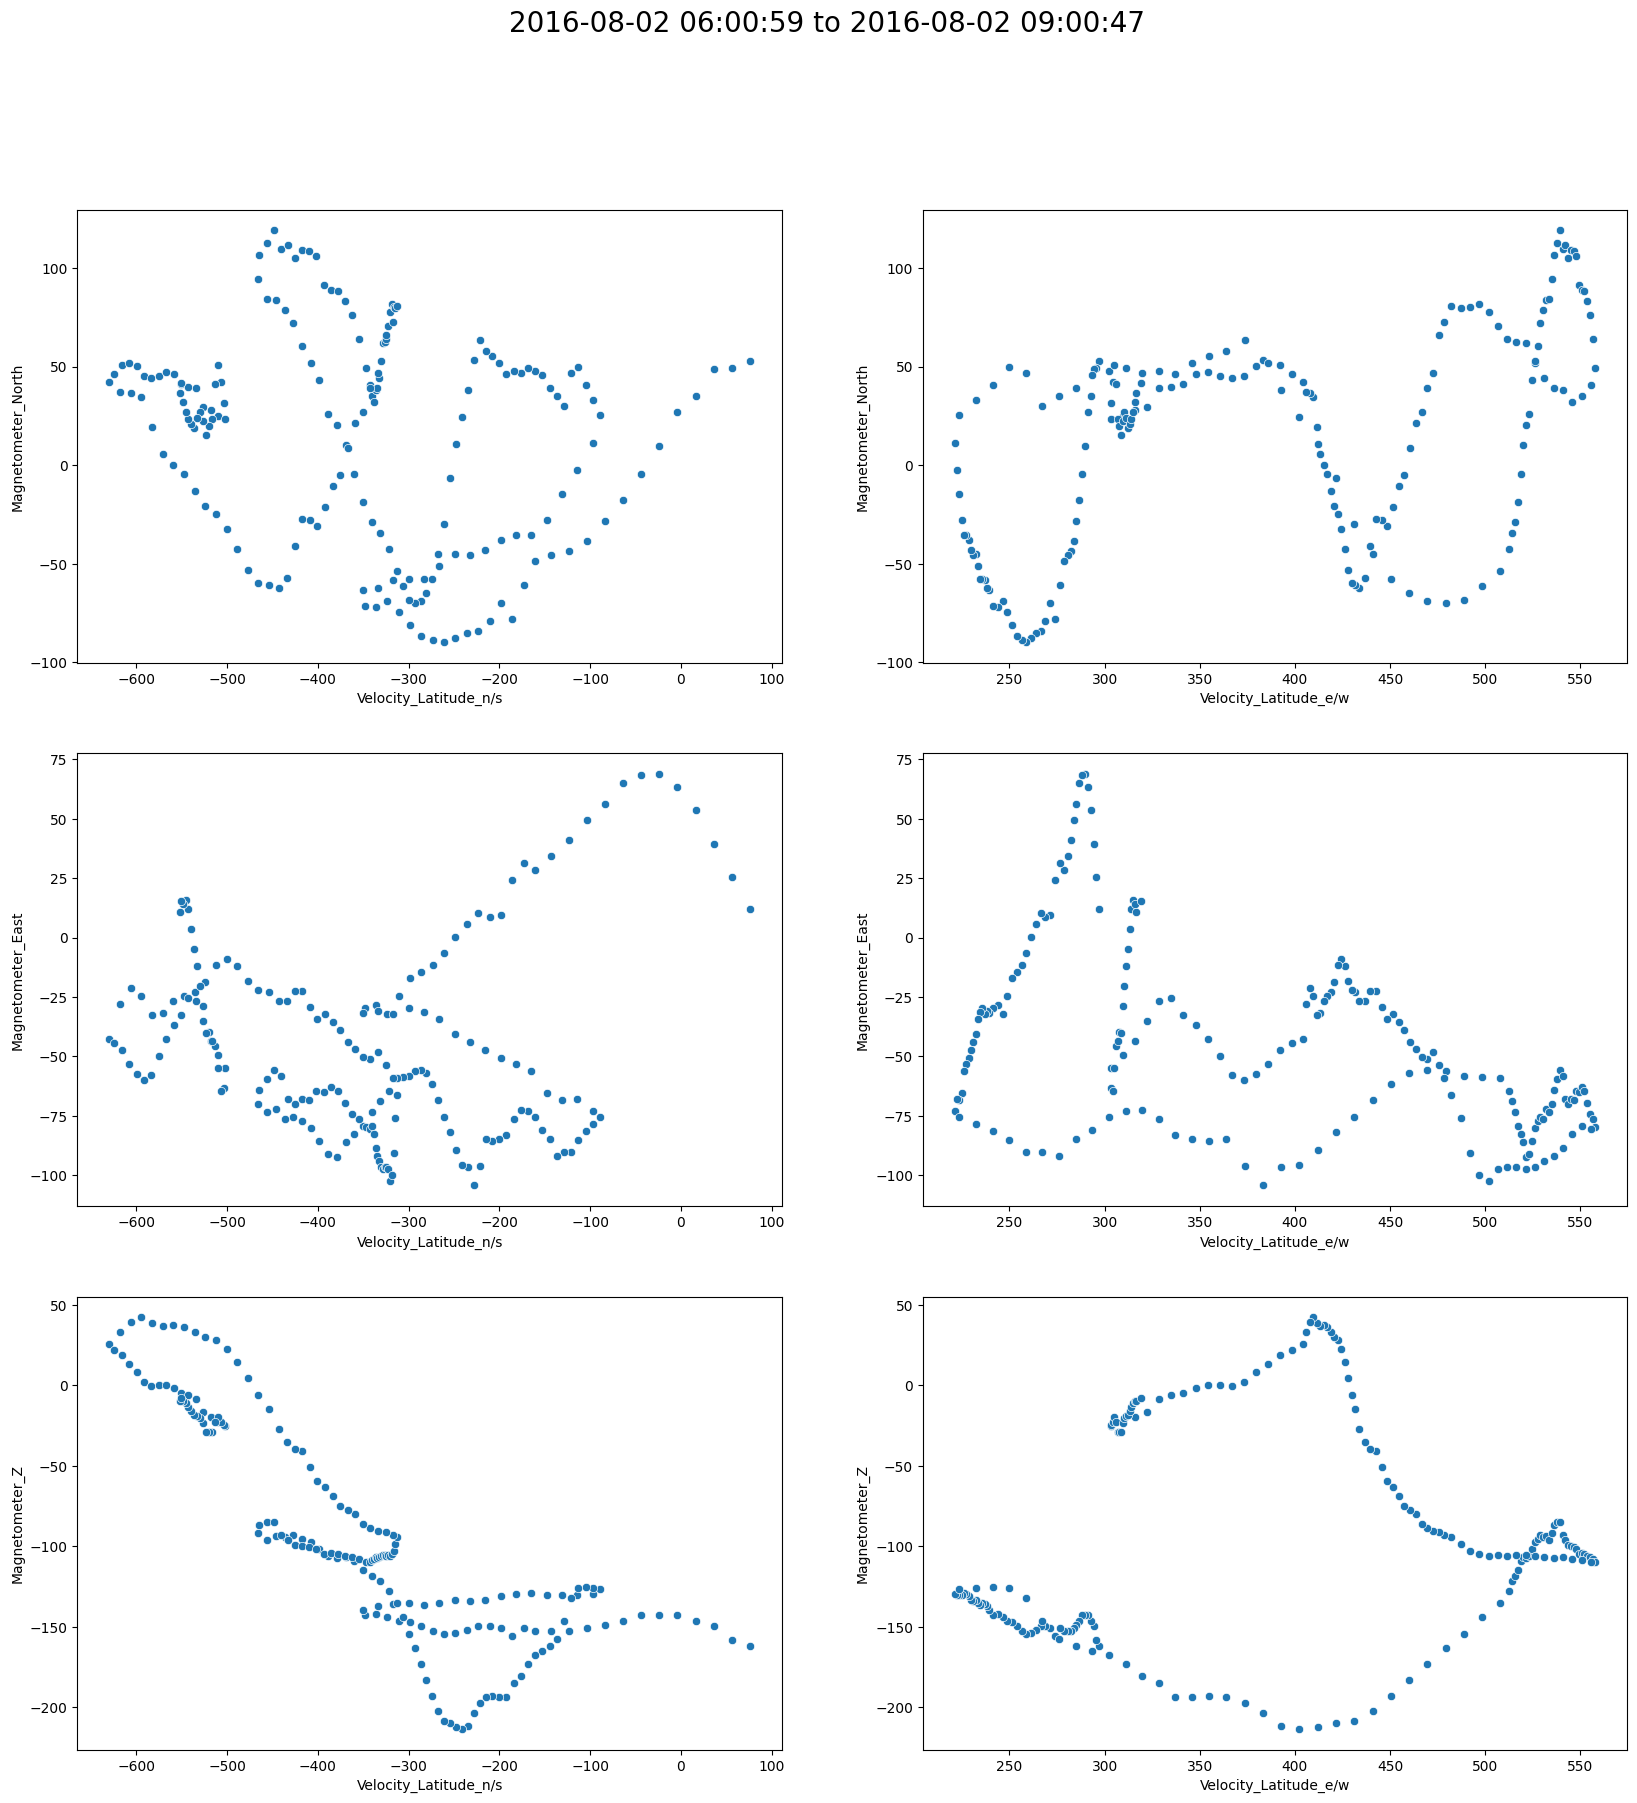

In [47]:
start = int(2*len(d6)/8)
end = int(3*len(d6)/8)
df = d6.iloc[start:end]

fig,axarr = plt.subplots(3,2,figsize=(20, 20))
fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

In [49]:
# start = int(3*len(d6)/8)
# end = int(4*len(d6)/8)
# df = d6.iloc[start:end]

# fig,axarr = plt.subplots(3,2,figsize=(20, 20))
# fig.suptitle(str(df['Date'].iloc[0])[0:19]+' to ' + str(df['Date'].iloc[-1])[0:19], fontsize=20)
# sns.scatterplot(ax=axarr[0][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_North')
# sns.scatterplot(ax=axarr[1][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_East')
# sns.scatterplot(ax=axarr[2][0],data=df,x='Velocity_Latitude_n/s',y='Magnetometer_Z')

# sns.scatterplot(ax=axarr[0][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_North')
# sns.scatterplot(ax=axarr[1][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_East')
# sns.scatterplot(ax=axarr[2][1],data=df,x='Velocity_Latitude_e/w',y='Magnetometer_Z')

In [30]:
# df_2013_06_05_1 = [0:32821]

In [31]:
df_2013_06_05_1 = df[0:2821]
df_2013_06_05_2 = df[2822:5451]

df_2014_09_11_1 = df[5452:7821]
df_2014_09_11_2 = df[7822:10727]

df_2015_06_22_1 = df[10728:13035]
df_2015_06_22_2 = df[13036:15342]

df_2016_06_23_1 = df[15343:18221]
df_2016_06_23_2 = df[18222:21099]

df_2016_08_02_1 = df[21100:23978]
df_2016_08_02_2 = df[23979:26856]

df_2017_05_17_1 = df[26857:28252]